C:\Users\gvbal\AppData\Local\Temp\ipykernel_2868\2592968446.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  loaded_df['Price'].fillna(method='ffill', inplace=True)  # Forward fill


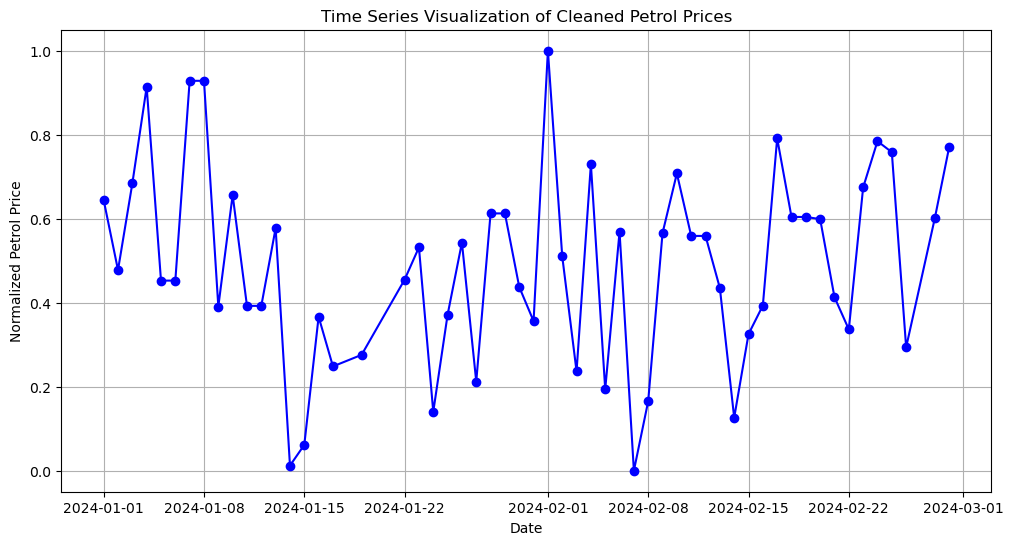

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Step 1: Generate Synthetic Time Series Data
np.random.seed(42)
date_range = pd.date_range(start='2024-01-01', periods=60, freq='D')
prices = np.random.normal(loc=100, scale=5, size=60)

# Introduce missing values
missing_indices = np.random.choice(60, 6, replace=False)
prices[missing_indices] = np.nan

# Introduce outliers
outlier_indices = np.random.choice(60, 3, replace=False)
prices[outlier_indices] = [200, 250, 180]

# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Price': prices})

# Save to CSV
csv_path = 'petrol_prices_timeseries.csv'
df.to_csv(csv_path, index=False)

# Step 2: Load Data
loaded_df = pd.read_csv(csv_path, parse_dates=['Date'])

# Step 3: Handle Missing Data
loaded_df['Price'].fillna(method='ffill', inplace=True)  # Forward fill

# Step 4: Detect & Remove Outliers
z_scores = np.abs(stats.zscore(loaded_df['Price']))
loaded_df = loaded_df[z_scores < 2]  # Keep values within 2 standard deviations

# Step 5: Normalize Data
scaler = MinMaxScaler()
loaded_df['Normalized_Price'] = scaler.fit_transform(loaded_df[['Price']])

# Step 6: Visualize Data
plt.figure(figsize=(12, 6))
plt.plot(loaded_df['Date'], loaded_df['Normalized_Price'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Normalized Petrol Price')
plt.title('Time Series Visualization of Cleaned Petrol Prices')
plt.grid(True)
plt.show()
